In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch as tc
import torch.nn.functional as F
from scipy import signal

float64
MSE:  0.000625000010419758


(-3, 3)

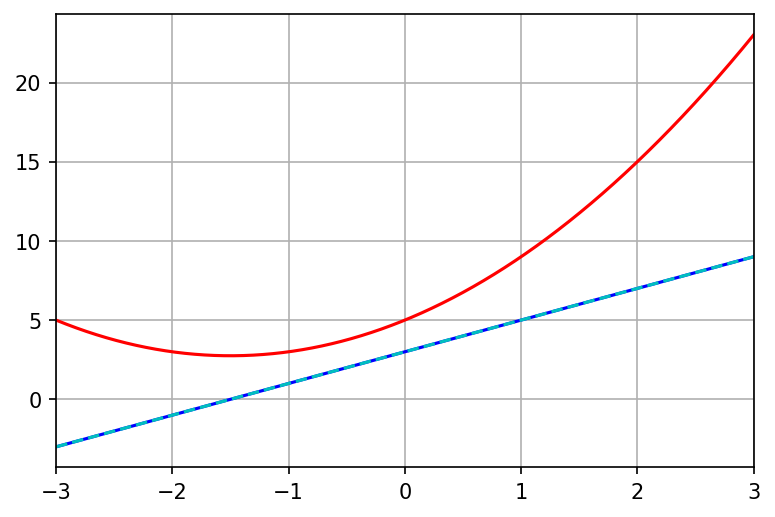

In [4]:
step = 0.001 #zdefiniowanie kroku
# errors = []
# steps = np.arange(0.0001, 1, 0.0001)
# for i in range(len(steps)):
# step = steps[i]
start = -3 #początek przedziału
stop = 3 #koniec przedziału
samples = int((stop - start) / step) #wygenerowanie liczby próbek

x = np.linspace(start, stop, samples) #wygenrowanie zakresu zmiennej x
print(x.dtype)
y = x**2 + 3*x + 5 #zdefiniowanie funkcji y
dy_real = 2*x + 3 #zdefiniowanie idealnej pochodnej funkcji y
dy_numerical = np.gradient(y, step) #obliczenie pochodnej numerycznej gotową funkcją

def mse(x1, x2): #zdefiniowanie funkcji do liczenia błędu średnio-kwadratowgo
    return np.mean(np.sqrt((x1 - x2)**2))

error = mse(dy_real, dy_numerical) #obliczenie błedu pochodnej numerycznej
# errors.append(error)
print("MSE: ", mse(dy_real, dy_numerical)) #wydrukowanie otrzymanego błędu


plt.figure(dpi=150) #przedstawienie wykresów 
plt.plot(x, y, "r-") #wykres funkcji y
plt.plot(x, dy_real, "b-") #wykres idealnej pochodnej funkcji y
plt.plot(x, dy_numerical, "c--") #wykres numerycznej pochodnej funkcji
plt.grid(True)
plt.xlim([start, stop]) #przycięcie wartości na osi x do ustalonego przedziału
# plt.figure()
# plt.plot(steps, errors, "r-")
# plt.grid(True)
# plt.show()

#Otrzymany błąd zależy od kwadratu naszego kroku 

MSE function:  7.99449817242448e-05
MSE derivative:  0.008538448179076195


(-3, 3)

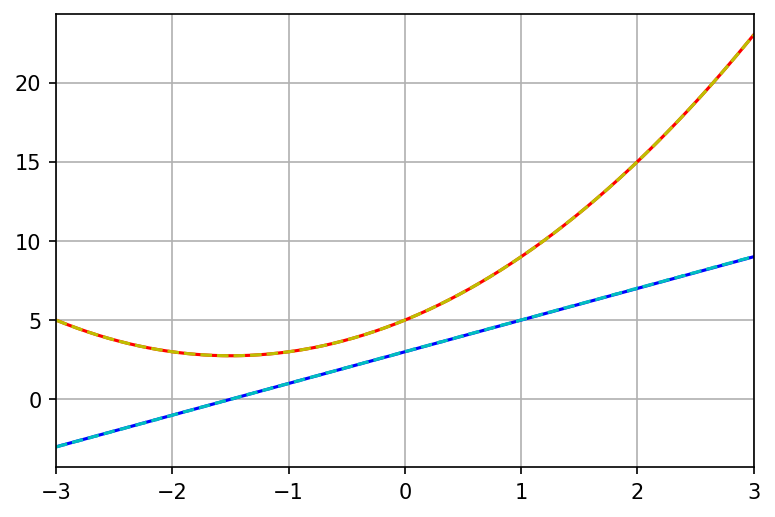

In [38]:
step = 0.01
start = -3
stop = 3
samples = int((stop - start) / step)
noise_level = 0.0001 #poziom szumu

x = np.linspace(start, stop, samples) #wygenerwanie zakresu zmiennej x
y = x**2 + 3*x + 5 #zdefiniowanie funkcji y
y_noise = y + np.random.randn(x.shape[0])*noise_level #funkcja y z szumem
dy_real = 2*x + 3 #pochodna idealna
dy_numerical = np.gradient(y_noise, step) #pochodna numeryczna

error = mse(dy_real, dy_numerical) #obliczenie błedu pochodnej numerycznej
print("MSE function: ", mse(y, y_noise)) #wydrukowanie błędu funkcji z szumem
print("MSE derivative: ", error) #wydrukowanie błedu pochodnej numerycznej

plt.figure(dpi=150) #przedstawienie wykresów
plt.plot(x, y, "r-") #wykres funkjci y
plt.plot(x, y_noise, "y--") #wykres funkcji y z szumem
plt.plot(x, dy_real, "b-") #wykres idealnej pochodnej funkcji y
plt.plot(x, dy_numerical, "c--") #wykres numerycznej pochodnej funkcji y
plt.grid(True)
plt.xlim([start, stop])

#Celem jest zminimalizowanie błedu miedzy pochodna idealną a numeryczną


In [5]:
#objaśnienie działania fukcji np.gradient()
signal1 = np.array([4, 7, 2, -2, 4], dtype = np.float32)
result = np.gradient(signal1)
print(result)

[ 3.  -1.  -4.5  1.   6. ]


MSE for central:  0.008301463167499891
MSE for forward:  0.018271044482154282
MSE for backward:  0.018271044482154473


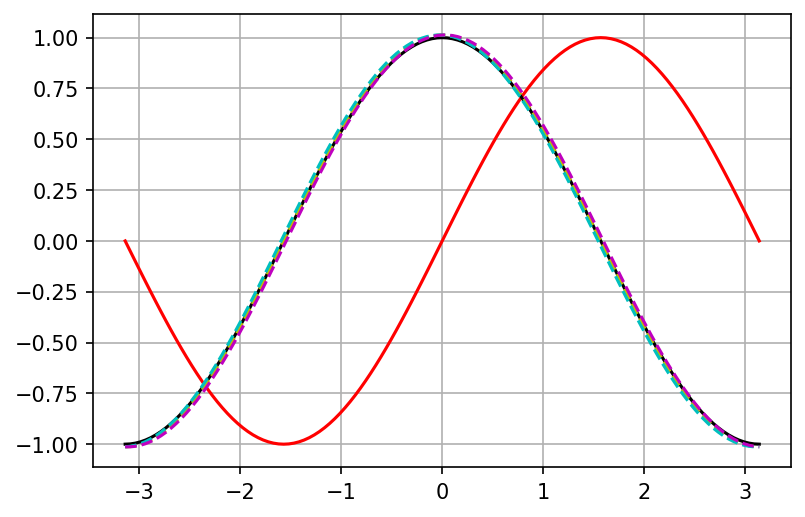

In [6]:
#ZADANIE 1
#Zaimplementuj funkcje (za pomocą pętli for, bez użycia gotowych funkcji) do obliczenia pochodnej funkcji
#jednej zmiennej "centralnie", "do przodu" i "do tyłu". Jakie są zalety poszczególnych rozwiązań? 
#Jakie są wady? Kiedy warto użyć jednej wersji zamiast drugiej?

def our_derivative (func, step, mode): #zdefiniowanie funkjci do obliczania pochodnej w różnym trybie
    
    # mode = central, forward, backward
    
    df = np.zeros(len(func)) #utworzenie tablicy wypełnionej zerami 
    
    if mode=="central": #oblicznie pochodnej dla różnic centralnych
        for i in range(1,len(func)-1): #pętla dla wszystkich wartości funkcji, poza brzegowymi
            df[i]=(func[i+1]-func[i-1])/(2*step) #algorytm liczenia wartości pochodnej centralnie 
        #Punkty brzegowe   
        df[0] = (func[1] - func[0])/step #przypisanie wartości punktowi początkowemu
        df[-1] =(func[-1]-func[-2])/step #przypisanie wartości punktowi końcowemu
    
    if mode=="forward": #oblicznie pochodnej dla różnicy progresywnej
        for i in range(len(func)-1): #pętla dla wszystkich wartości funkcji, poza końcową
            df[i]=(func[i+1]-func[i])/step #algorytm liczenia wartości pochodnej do przodu
        #Punkt końcowy   
        df[-1] = (func[-1] - func[-2])/step #przypisanie wartości punktowi końcowemu

    if mode=="backward": #oblicznie pochodnej dla różnicy wstecznej
        for i in range(1,len(func)): #pętla dla wszystkich wartości funkcji, poza kpoczątkową
            df[i]=(func[i]-func[i-1])/step #algorytm liczenia wartości pochodnej do tyłu
        #Punkt początkowy    
        df[0] = (func[1] - func[0])/step #przypisanie wartości punktowi początkowemu

    return df #zwrócenie tablicy wypełnionej wartościami pochodnej 

step = 0.05
start = -np.pi
stop = np.pi
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = np.sin(x) #zdefiniowanie funkcji y

print("MSE for central: ", mse(np.cos(x), our_derivative(y, step, "central")))
print("MSE for forward: ", mse(np.cos(x), our_derivative(y, step, "forward")))
print("MSE for backward: ", mse(np.cos(x), our_derivative(y, step, "backward")))

plt.figure(dpi=150) #przedstawienie wykresów
plt.plot(x,y,"r") #wykres funkcji y
plt.plot(x,np.cos(x), "k") #wykres pochodnej funkcji y
plt.plot(x,our_derivative(y, step, "central"),"y--") #wykres numerycznej pochodnej funkcji y "centralnie"
plt.plot(x,our_derivative(y, step, "forward"),"c--") #wykres numerycznej pochodnej funkcji y "do przodu"
plt.plot(x,our_derivative(y, step, "backward"),"m--") #wykres numerycznej pochodnej funkcji y "do tyłu"
plt.grid(True)
plt.show()

#Obliczanie centralnie jest najbliższe idealnej funkcji, niecentralne maja bład zalezny od kroku 
#(centralna ma od kwadratu kroku) dlatego ich wartości maja większy bład
#centralnie nie liczy ostatnich wartosci na krawedziach
#zastosowanie w przod i do tylu  - liczenie w czasie rzeczywistym
#najdokładniejszy wynik jak odejmiejmy od siebie w przod i do tylu

Splot

In [91]:
#wyjasnienie działa funkcji signal.convlove()

x1 = np.array([2, 3, 5, 1, 2, 6, 5, 7, 8], dtype=np.float32)
x2 = np.array([1, 5, 3, 4], dtype=np.float32)

# 3 2 1

# 0 2 3 5 1 2 6
# 3 2 1

# 2 3 5 1 2 6
# 3 2 1

# 2 3 5 1 2 6
#   3 2 1

# 2 3 5 1 2 6
#     3 2 1

# 2 3 5 1 2 6
#       3 2 1

# 2 3 5 1 2 6
#         3 2 1

# x 17 20 19 13 x

result = signal.convolve(x1, x2, mode="full")
print(result)

result = signal.convolve(x1, x2, mode="same")
print(result)

result = signal.convolve(x1, x2, mode="valid")
print(result)



[ 2. 13. 26. 43. 34. 39. 45. 58. 82. 81. 52. 32.]
[13. 26. 43. 34. 39. 45. 58. 82. 81.]
[43. 34. 39. 45. 58. 82.]


In [9]:
#ZADANIE 2
#Zaimplementuj funkcje do obliczania splotu 1-D (iteracyjnie, beztransformacji Fouriera, bez użycia gotowych funkcji).
#Porównaj działanie zaimplementowanej funkcji z funkcją biblioteczną (scipy) oraz czas wykonywania obliczeń. 
#Która funkcja jest szybsza? O ile? Dlaczego? Czy wyniki są identyczne? Porównaj działanie funkcji bibliotecznej 
#liczącą splot z definicji oraz z transformacji Fouriera (sprawdź dla różnych wielkości tablic wejściowych)

#Tab1 = np.array([2, 3, 5, 1, 2, 6, 5, 7, 8], dtype=np.float32) #tablica do testowania funkcji
#Tab2 = np.array([1, 5, 3, 4], dtype=np.float32) #tablica do testowania funkcji

Tab1 = np.random.randint(1, 10, 10000)
Tab2 = np.random.randint(1, 10, 99)

def our_convolution(x1,x2,mode): #zdefniowanie funkcji do liczenia splotu 1-D
    
    x2 = np.flip(x2) #odwrócenie tablicy 

    if len(x1) > len(x2): #sprawdzenie czy tablica pierwsza jest dłuższa od drugiej
        pass
    else:
        z = x1 #zamiana tablic jeżeli pierwsza jest krótsza od drugiej
        x1 = x2
        x2 = z
    
    for i in range(len(x2)-1): #pętla do rozszerzenia dłuższej tablicy o zera 
        x1 = np.insert(x1, i, 0) #dodanie zer na początku tablicy
        x1 = np.insert(x1, int(len(x1)-i), 0) #dodanie zer na końcu tablicy
            
    conv = np.zeros(len(x1)-len(x2)+1) #zdefiniowanie pustej tablicy, która będzie wynikiem konwolucji
    a = 0 #wartość kolejnych elementów w tablicy conv
    
    for i in range(len(x1)-len(x2)+1): #pętla do zapelnienia tablicy konwolucji
        for j in range(len(x2)): #pętla do liczenia kolejnych wartosci a
            a += x1[i+j]*x2[j] # algorytm liczenia wartości a 
        conv[i] = a #przypisanie wartości a kolejnym elementom w tablicy conv
        a = 0 #wyzerowaie a

    if mode=="full": 
        return conv #zwrócenie pełnej tablicy conv
    
    if mode=="same":
        if len(x2)%2==0:
            return conv[round((len(x2)-2)/2):-round((len(x2)-1)/2)-1] #zwrócenie tablicy conv o takim samym rozmiarze
            #jak dłuższa tablica
        else:
            return conv[round((len(x2)-1)/2):-round((len(x2)-1)/2)-1] #zwrócenie tablicy conv o takim samym rozmiarze
            #jak dłuższa tablica

    if mode=="valid":
        return conv[len(x2)-1:-(len(x2)-1)] #zwrócenie tablicy w której nie ma wartości obliczonych z wykorzstaniem 0
        
f_full = our_convolution(Tab1,Tab2,mode="full") #obliczenie splotu 1-D dla full
f_same = our_convolution(Tab1,Tab2,mode="same") #obliczenie splotu 1-D dla same
f_valid = our_convolution(Tab1,Tab2,mode="valid") #obliczenie splotu 1-D dla valid

print("Our convolution full:", f_full)
print("Our convolution same:", f_same)
print("Our convolution valid:", f_valid, "\n")

print("Scipy covolution full:", signal.convolve(Tab1,Tab2, mode="full" ))
print("Scipy covolution same:", signal.convolve(Tab1,Tab2, mode="same" ))
print("Scipy covolution valid:", signal.convolve(Tab1,Tab2, mode="valid" ))
print("Fourier convolution:", signal.fftconvolve(Tab1,Tab2), "\n")

b_t = time.time()
f_full_scipy = signal.convolve(Tab1,Tab2) #liczenie splotu z funkcji SciPy
e_t = time.time()
print("Elapsed time scipy: ","%.15f" % float(e_t - b_t))

b_t = time.time()
f_full = our_convolution(Tab1,Tab2,mode="full") #liczenie splotu z naszej funkcji
e_t = time.time()
print("Elapsed time our func: ","%.15f" % float(e_t - b_t))

b_t = time.time()
f_full_fourier = signal.fftconvolve(Tab1,Tab2) #liczenie splotu z transformacji Fouriera
e_t = time.time()
print("Elapsed time fourier: ","%.15f" % float(e_t - b_t))


#Po zwiekszeniu tablic do duzych rozmiarów, widac że nasza funkcja liczy splot najwolniej. Powyżej 300 razy wolniej. 
#Jest to ogromna różnica. Otrzymane wyniki są identyczne dla wszystkich metod
#nasza funkcja jest iteracyjnie, wbudowane sa znacznie lepiej napisane

Our convolution full: [ 8. 61. 89. ... 93. 52. 28.]
Our convolution same: [1020. 1114. 1162. ... 1194. 1153. 1137.]
Our convolution valid: [2267. 2206. 2170. ... 2272. 2208. 2134.] 

Scipy covolution full: [ 8 61 89 ... 93 52 28]
Scipy covolution same: [1020 1114 1162 ... 1153 1137 1159]
Scipy covolution valid: [2267 2206 2170 ... 2272 2208 2134]
Fourier convolution: [ 8. 61. 89. ... 93. 52. 28.] 

Elapsed time scipy:  0.002001762390137
Elapsed time our func:  0.333303213119507
Elapsed time fourier:  0.001000404357910


MSE real/numerical:  0.036854703294033016
MSE real/numerical_conv:  0.036854703294033016
MSE numerical/numerical_conv:  0.0


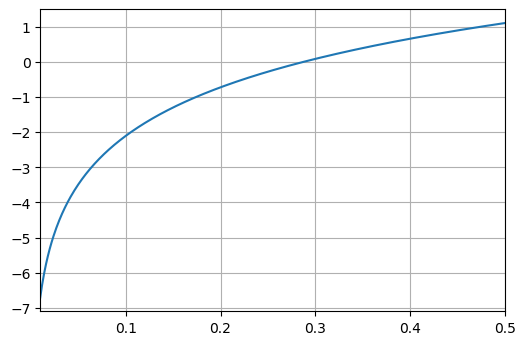

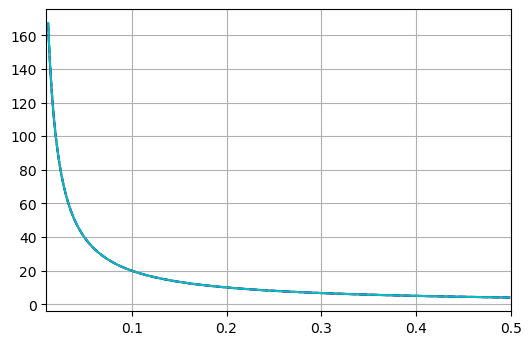

In [6]:
step = 0.001
start = 0.01
stop = 0.5
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = 2*np.log(x) + 2.5 #zdefiniowanie funkcji y
dy_real = 2 / x #zdefiniowanie idealnej pochodnej funkcji y
dy_numerical = np.gradient(y) / (step) #obliczenie pochodnej numerycznej funkcji y
dy_numerical_conv = signal.convolve(y, np.array([1, 0, -1]), mode='same') / (2*step) #obliczenie pochodnej numerycznej funkcji y
# signal.correlate(y, np.array([-1, 0, 1]), mode='same) / (2*step)

# [0, -1, 1]
# [-1, 1, 0]
# [1, 0, -1]
# [-1, 0, 1]

print("MSE real/numerical: ", mse(dy_real[2:-2], dy_numerical[2:-2])) 
print("MSE real/numerical_conv: ", mse(dy_real[2:-2], dy_numerical_conv[2:-2]))
print("MSE numerical/numerical_conv: ", mse(dy_numerical[2:-2], dy_numerical_conv[2:-2]))

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim([start, stop])
plt.grid(True)

plt.figure(dpi=100)
plt.plot(x[2:-2], dy_real[2:-2], "r-")
plt.plot(x[2:-2], dy_numerical[2:-2], "b--")
plt.plot(x[2:-2], dy_numerical_conv[2:-2], "c-")
plt.xlim([start, stop])
plt.grid(True)

#bład rośnie ze zmniejszeniem wartosi start, bo mniejszy krok nie oddaje prawidzwej dynamiki tej funkcji
#im funkcja bliżej zera, tym dwie próbki są oddalone od siebie wartościowo
#Im krok większy tym mniejszy bład
#oba sposoby daja identyczny rezultat

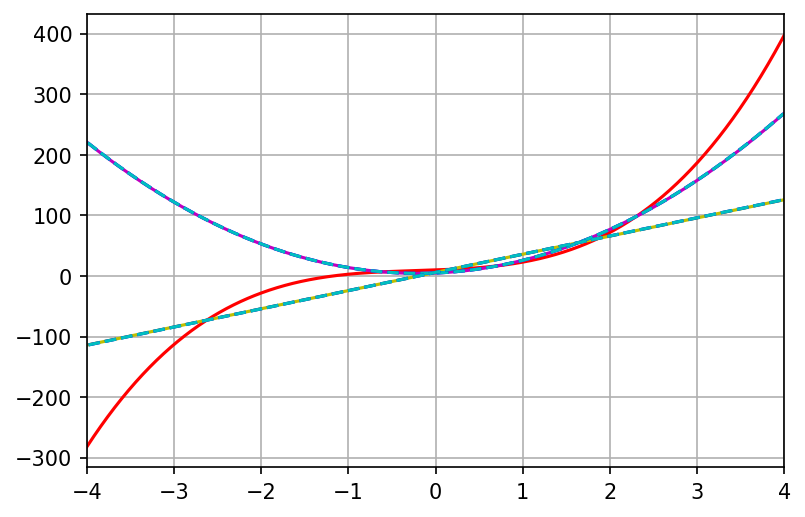

MSE function for real/our_sequential:  0.15009457738701898
MSE function for real/our_convolve:  0.15009457738701898
MSE function for scipy_covlove/our_convolve:  0.0 

Elapsed time our_seq:  0.0020008087
Elapsed time our_conv:  0.0030033588
Elapsed time gradient:  0.0000000000
Elapsed time scipy_conv:  0.0010006428


In [13]:
#ZADANIE 3 ver. 1.0
#Zaimplementuj funkcje (za pomocą pętli for, bez użycia gotowych funkcji) do obliczenia pochodnej funkcji 
#jednej zmiennej "centralnie", która umożliwia wybór rzędu pochodnej (1, 2, 3, 4) oraz trybu (splot lub sekwencyjnie). 
#Porównaj wynik z wartościami analitycznymi na przykładowym wielomianie wyższego stopnia. 
#Przeanalizuj błędy numeryczne (m.in. porównaj obliczenia zapomocą splotu z sekwencyjnym obliczaniem pierwszej pochodnej).
#Porównaj czas wykonywania obliczeń. Skąd się biorą różnice? Które rozwiązanie jest szybsze? 
#Które rozwiązanie jest bardziej stabilne? Które rozwiązanie jest obarczone mniejszym błędem?

step = 0.01
start = -4
stop = 4
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x 
y = 5*x**3 + 3*x**2 + 5*x + 10 #zdefiniowanie funkcji y
#y = 5*x**2 + 3*x + 2

def our_derivative(func, step, order, mode): #zdefiniowanie funkcji do liczenia pochodnej
    
    ar = np.array([-1,0,1]) #tablica wykorzystywana przy liczeniu metodą splotu
     
    if mode=="seq": #Liczenie pochodnej sekwencjonalnie 
        
        df = np.zeros(len(func)) #tablica zer, która zostanie wypełniona wartościami pochodnej 
            
        for i in range(1,len(x)-1): #pętla do liczenia wartości pochodnej dla kolejnych elementów
            df[i]=(func[i+1] - func[i-1])/(2*step) #algorytm liczenia wartości pochodnej centralnie 
            
        df[0] = (func[1] - func[0])/step #przypisanie wartości punktowi początkowemu
        df[-1] = (func[-1] - func[-2])/step #przypisanie wartości punktowi końcowemu
    
    if mode=="conv": #Liczenie pochodnej ze splotu
        
        df = np.zeros(len(func)) #tablica zer, która zostanie wypełniona wartościami pochodnej 
            
        for i in range(2): #pętla do dodania zer do tablicy wartosci funkcji (zmiana rozmiaru na 604)
            func = np.insert(func,i,0) #dodanie zer na początek tablicy
            func = np.insert(func,int(len(func)-i),0) #dodanie zer na koniec tablicy
            
        conv = np.zeros(len(func)-2) #utworzenie tablicy którą wypełnimy wartościami splotu
        
        a = 0 #wartość kolejnych elementów w tablicy conv
        for i in range(len(func)-2): #pętla do zapelnienia tablicy konwolucji
            for j in range(3): #pętla do liczenia kolejnych wartosci a
                a += func[i+j]*ar[j] # algorytm liczenia wartości a 
            conv[i] = a #przypisanie wartości a kolejnym elementom w tablicy conv
            a = 0 #wyzerowaie a
 
        conv = conv[1:-1] #zmiana wielkosci tablicy conv na rozmiar tablicy func przed dodaniem zer (czyli 600)

        df = conv/(2*step) #zmiana splotu na tablicę wartości pochodnej
        
    if order==1: 
        return df #zwrócenie funkcji jeżeli order = 1
    else:
        return our_derivative (df, step, order-1, mode) #powtórzenie wykonania funkcji do momentu otrzymania order = 1
    
    
dy_real = 15*x**2 + 6*x + 5 #pierwsza idealna pochodna funkcji y
ddy_real = 30*x + 6 #druga idealna pochodna funkcji y


dy_numerical_seq = our_derivative(y, step, 1, "seq" ) #obliczenie numerycznej pochodnej 1 rzędu funkcji y sekwencjonalnie
dy_numerical_conv = our_derivative(y, step, 1, "conv" ) #obliczenie numerycznej pochodnej 1 rzędu funkcji y splotem


ddy_numerical_seq = our_derivative(y, step, 2, "seq" ) #obliczenie numerycznej pochodnej 2 rzędu funkcji y sekwencjonalnie
ddy_numerical_conv = our_derivative(y, step, 2, "conv" ) #obliczenie numerycznej pochodnej 2 rzędu funkcji y splotem

plt.figure(dpi=150) #przedstawienie wykresów 
plt.plot(x, y, "r") #wykres funkcji y
plt.plot(x, dy_real, "m") #wykres pierwszej pochodnej idealnej funkcji y
plt.plot(x, ddy_real, "y") #wykres drugiej pochodnej idealnej funkcji y
plt.plot(x[1:-1], dy_numerical_seq[1:-1], "b--") #wykres pierwszej pochodnej numerycznej funkcji y sekwencjonalnie
plt.plot(x[1:-1], dy_numerical_conv[1:-1], "c--") #wykres pierwszej pochodnej numerycznej funkcji y splotem
plt.plot(x[2:-2], ddy_numerical_seq[2:-2], "b--") #wykres drugiej pochodnej numerycznej funkcji y sekwencjonalnie
plt.plot(x[2:-2], ddy_numerical_conv[2:-2], "c--") #wykres drugiej pochodnej numerycznej funkcji y splotem
plt.grid(True)
plt.xlim(start, stop)
plt.show()

#przy rysowaniu wykresów pominęto wartości brzegowe

error = mse(ddy_real[2:-2], ddy_numerical_seq[2:-2]) #obliczenie błedu naszej funkcji sekwencjonalnej dla pochodnej 2 
print("MSE function for real/our_sequential: ", error)

error = mse(ddy_real[2:-2], ddy_numerical_conv[2:-2]) #obliczenie błedu naszej funkcji z spoltu dla pochodnej 2 
print("MSE function for real/our_convolve: ", error)

dy_conv = signal.convolve(y, np.array([1, 0, -1]), mode="same") / (2*step) #funcja scipy do pochodnej ze splotu

error = mse(dy_conv, dy_numerical_conv) #obliczenie błedu naszej funkcji splotu dla pochodnej 1 z funckja scipy
print("MSE function for scipy_covlove/our_convolve: ", error, "\n")


b_t = time.time()
ddy_numerical_seq = our_derivative(y, step, 2, "seq" ) #czas na policzenie 2 pochodnej nasza funkcją seq
e_t = time.time()
print("Elapsed time our_seq: ","%.10f" % float(e_t - b_t))

b_t = time.time()
ddy_numerical_conv = our_derivative(y, step, 2, "conv" ) #czas na policzenie 2 pochodnej nasza funkcją conv
e_t = time.time()
print("Elapsed time our_conv: ","%.10f" % float(e_t - b_t))


b_t = time.time()
dy_numerical = np.gradient(y, step)
ddy_numerical = np.gradient(dy_numerical, step)  #czas na policzenie 2 pochodnej funkcją gradient
e_t = time.time()
print("Elapsed time gradient: ","%.10f" % float(e_t - b_t))

b_t = time.time()
ddy_numerical_conv = signal.convolve(y, np.array([1, -2, 1]), mode='same') / (step**2) #czas na policzenie 2 pochodnej scipy
e_t = time.time()
print("Elapsed time scipy_conv: ", "%.10f" % float(e_t - b_t))



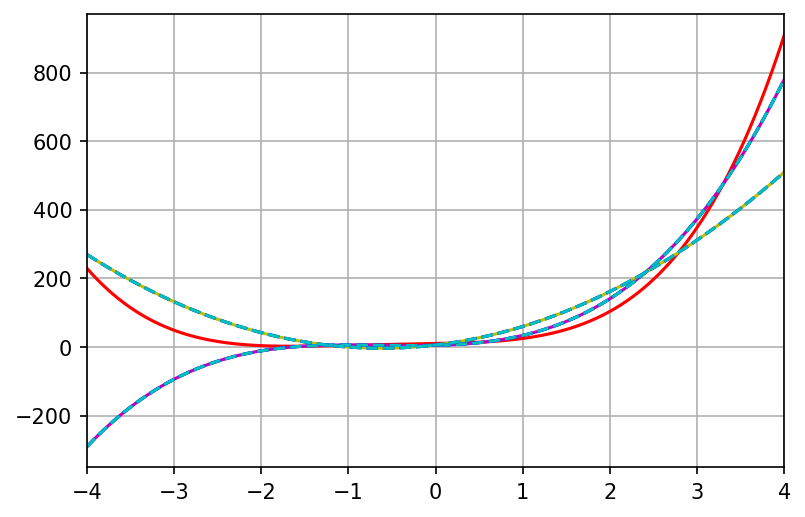

MSE function for real/our_sequential:  0.03359105917038724
MSE function for real/our_convolve:  0.03359105916638844
MSE function for scipy_covlove/our_convolve:  0.0 

Elapsed time our_seq:  0.0090081692
Elapsed time our_conv:  0.0150139332
Elapsed time gradient:  0.0010018349
Elapsed time scipy_conv:  0.0000000000


In [14]:
#ZADANIE 3 ver 2.0
#Zaimplementuj funkcje (za pomocą pętli for, bez użycia gotowych funkcji) do obliczenia pochodnej funkcji 
#jednej zmiennej "centralnie", która umożliwia wybór rzędu pochodnej (1, 2, 3, 4) oraz trybu (splot lub sekwencyjnie). 
#Porównaj wynik z wartościami analitycznymi na przykładowym wielomianie wyższego stopnia. 
#Przeanalizuj błędy numeryczne (m.in. porównaj obliczenia zapomocą splotu z sekwencyjnym obliczaniem pierwszej pochodnej).
#Porównaj czas wykonywania obliczeń. Skąd się biorą różnice? Które rozwiązanie jest szybsze? 
#Które rozwiązanie jest bardziej stabilne? Które rozwiązanie jest obarczone mniejszym błędem?

step = 0.001
start = -4
stop = 4
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x 
#y = 5*x**3 + 3*x**2 + 5*x + 10 #zdefiniowanie funkcji y
y = 2*x**4 + 5*x**3 + 3*x**2 + 5*x + 10


def our_derivative(func, step, order, mode): #zdefiniowanie funkcji do liczenia pochodnej
    
    df = np.zeros(len(func)) #tablica zer, która zostanie wypełniona wartościami pochodnej 
     
    if mode=="seq": #Liczenie pochodnej sekwencjonalnie 
        
        if order == 1: #dla pierwszej pochodnej
            for i in range(1,len(x)-1): #pętla do liczenia wartości pochodnej dla kolejnych elementów
                df[i] =( func[i+1] - func[i-1])/(2*step) #algorytm liczenia wartości pochodnej centralnie 

        if order == 2: #dla drugiej pochodnej
            for i in range(1,len(x)-1): #pętla do liczenia wartości pochodnej dla kolejnych elementów
                df[i] = (func[i+1] - 2*func[i] + func[i-1])/(step**2) #algorytm liczenia wartości pochodnej centralnie 
            
        if order == 3: #dla trzeciej pochodnej
            for i in range(2,len(x)-2): #pętla do liczenia wartości pochodnej dla kolejnych elementów
                df[i] = (func[i+2] - func[i-2] + 2*func[i-1] - 2*func[i+1])/(2 * step**3) #algorytm liczenia wartości pochodnej centralnie 
                
        if order == 4: #dla czwartej pochodnej
            for i in range(2,len(x)-2): #pętla do liczenia wartości pochodnej dla kolejnych elementów
                df[i] = (func[i+2] + func[i-2] - 4*func[i-1] - 4*func[i+1] + 6*func[i])/(step**4) #algorytm liczenia wartości pochodnej centralnie 
                
    
    if mode=="conv": #Liczenie pochodnej ze splotu
        
        if order == 1: #dla pierwszej pochodnej
            ar = np.array([-1, 0, 1]) #tablica wykorzystywana przy liczeniu metodą splotu
            h = 2*step
            
        if order == 2: #dla drugiej pochodnej
            ar = np.array([1, -2, 1]) #tablica wykorzystywana przy liczeniu metodą splotu
            h = step**2
            
        if order == 3: #dla trzeciej pochodnej
            ar = np.array([-1, 2, 0, -2, 1]) #tablica wykorzystywana przy liczeniu metodą splotu
            h = 2*step**3
            
        if order == 4: #dla czwartej pochodnej
            ar = np.array([1,-4, 6, -4, 1]) #tablica wykorzystywana przy liczeniu metodą splotu
            h = step**4
           
        for i in range(len(ar)-1): #pętla do dodania zer do tablicy wartosci funkcji (zmiana rozmiaru na 604)
            func = np.insert(func,i,0) #dodanie zer na początek tablicy
            func = np.insert(func,int(len(func)-i),0) #dodanie zer na koniec tablicy
            
        conv = np.zeros(len(func)-len(ar)+1) #utworzenie tablicy którą wypełnimy wartościami splotu
        
        a = 0 #wartość kolejnych elementów w tablicy conv
        for i in range(len(func)-len(ar)+1): #pętla do zapelnienia tablicy konwolucji
            for j in range(len(ar)): #pętla do liczenia kolejnych wartosci a
                a += func[i+j]*ar[j] # algorytm liczenia wartości a 
            conv[i] = a #przypisanie wartości a kolejnym elementom w tablicy conv
            a = 0 #wyzerowaie a
 
        conv = conv[1:-1] #zmiana wielkosci tablicy conv na rozmiar tablicy func przed dodaniem zer (czyli 600)

        df = conv / h  #zmiana splotu na tablicę wartości pochodnej
        
    return df #zwrócenie pochodnej funkcji



#dy_real = 15*x**2 + 6*x + 5 #pierwsza idealna pochodna funkcji y
#ddy_real = 30*x + 6 #druga idealna pochodna funkcji y

dy_real = 8*x**3 + 15*x**2 + 6*x + 5 #pierwsza idealna pochodna funkcji y
ddy_real = 24*x**2 + 30*x + 6 #druga idealna pochodna funkcji y


dy_numerical_seq = our_derivative(y, step, 1, "seq" ) #obliczenie numerycznej pochodnej 1 rzędu funkcji y sekwencjonalnie
dy_numerical_conv = our_derivative(y, step, 1, "conv" ) #obliczenie numerycznej pochodnej 1 rzędu funkcji y splotem

ddy_numerical_seq = our_derivative(y, step, 2, "seq" ) #obliczenie numerycznej pochodnej 2 rzędu funkcji y sekwencjonalnie
ddy_numerical_conv = our_derivative(y, step, 2, "conv" ) #obliczenie numerycznej pochodnej 2 rzędu funkcji y splotem


plt.figure(dpi=150) #przedstawienie wykresów 
plt.plot(x, y, "r") #wykres funkcji y
plt.plot(x, dy_real, "m") #wykres pierwszej pochodnej idealnej funkcji y
plt.plot(x, ddy_real, "y") #wykres drugiej pochodnej idealnej funkcji y
plt.plot(x[2:-2], dy_numerical_seq[2:-2], "b--") #wykres pierwszej pochodnej numerycznej funkcji y sekwencjonalnie
plt.plot(x[2:-2], dy_numerical_conv[2:-2], "c--") #wykres pierwszej pochodnej numerycznej funkcji y splotem
plt.plot(x[2:-2], ddy_numerical_seq[2:-2], "b--") #wykres drugiej pochodnej numerycznej funkcji y sekwencjonalnie
plt.plot(x[2:-2], ddy_numerical_conv[2:-2], "c--") #wykres drugiej pochodnej numerycznej funkcji y splotem
plt.grid(True)
plt.xlim(start, stop)
plt.show()

#przy rysowaniu wykresów pominęto wartości brzegowe

error = mse(ddy_real[2:-2], ddy_numerical_seq[2:-2]) #obliczenie błedu naszej funkcji sekwencjonalnej dla pochodnej 2 
print("MSE function for real/our_sequential: ", error)

error = mse(ddy_real[2:-2], ddy_numerical_conv[2:-2]) #obliczenie błedu naszej funkcji z spoltu dla pochodnej 2 
print("MSE function for real/our_convolve: ", error)

dy_conv = signal.convolve(y, np.array([1, 0, -1]), mode="same") / (2*step) #funcja scipy do pochodnej ze splotu

error = mse(dy_conv, dy_numerical_conv) #obliczenie błedu naszej funkcji splotu dla pochodnej 1 z funckja scipy
print("MSE function for scipy_covlove/our_convolve: ", error, "\n")


b_t = time.time()
ddy_numerical_seq = our_derivative(y, step, 2, "seq" ) #czas na policzenie 2 pochodnej nasza funkcją seq
e_t = time.time()
print("Elapsed time our_seq: ","%.10f" % float(e_t - b_t))

b_t = time.time()
ddy_numerical_conv = our_derivative(y, step, 2, "conv" ) #czas na policzenie 2 pochodnej nasza funkcją conv
e_t = time.time()
print("Elapsed time our_conv: ","%.10f" % float(e_t - b_t))


b_t = time.time()
dy_numerical = np.gradient(y, step)
ddy_numerical = np.gradient(dy_numerical, step)  #czas na policzenie 2 pochodnej funkcją gradient
e_t = time.time()
print("Elapsed time gradient: ","%.10f" % float(e_t - b_t))

b_t = time.time()
ddy_numerical_conv = signal.convolve(y, np.array([1, -2, 1]), mode='same') / (step**2) #czas na policzenie 2 pochodnej scipy
e_t = time.time()
print("Elapsed time scipy_conv: ", "%.10f" % float(e_t - b_t))



In [12]:
length = int(1e8) #zdefiniowanie długości
ftype = np.float64 #zdefiniowanie typu
#device = "cuda:0"

array = np.random.randn(length).astype(ftype) #wygenerowanie tablicy szumu z 10 mln próbek
tensor = tc.from_numpy(array) #
#tensor_gpu = tensor.to(device)
mask = np.array([1, 0, -1], dtype=ftype)
mask_tc = tc.from_numpy(mask)
#mask_tc_gpu = mask_tc.to(device)

print(array.dtype)
print(tensor.dtype)

#dekorator
def measure_time(input_func): #zdefiniowanie funkcji mierzenia czasu
    def inner_func(input): #funkcja wewnetrzna
        b_t = time.time() #mierzenie czasu
        result = input_func(input)
        e_t = time.time()
        print("Elapsed time: ", e_t - b_t, " seconds.") #wypisanie ile czsu mineło
        return result #zwraca zadana funkcje
    return inner_func #zwraca funkcje wewnetrzna

np_gradient = measure_time(np.gradient) # gradient to input function
np_convolve = measure_time(lambda input: signal.convolve(input, mask, mode='same'))
#Konowlucja w bibliotece PyTorch 1 wymiarowa, padding = 1 da same
tc_convolve = measure_time(lambda input: F.conv1d(input.view(1, 1, -1), mask_tc.view(1, 1, 3), padding=1))
#tc_convolve_gpu = measure_time(lambda input: F.conv1d(input.view(1, 1, -1), mask_tc_gpu.view(1, 1, 3), padding=1))

print("\nNumPy gradient: ")
np_gradient(array) #array to input
print("\nNumPy gradient_conv: ")
np_convolve(array)
print("\nPyTorch gradient_conv: ")
tc_convolve(tensor)
#print("PyTorch gradient_conv GPU: ")
#tc_convolve_gpu(tensor_gpu)


#Na gpu szybciej się liczy, typ danych ma wplyw na czas obliczen

float64
torch.float64

NumPy gradient: 
Elapsed time:  0.6130704879760742  seconds.

NumPy gradient_conv: 
Elapsed time:  3.5013697147369385  seconds.

PyTorch gradient_conv: 
Elapsed time:  1.3082966804504395  seconds.


tensor([[[ 0.8514,  0.6761, -1.4464,  ...,  0.8089,  0.2642, -0.0051]]],
       dtype=torch.float64)

In [157]:
0.5572323799133301 / 0.00029850006103515625

1866.7747603833866

MSE:  0.04835540588809682
MSE:  0.1946296156443357


(-3, 3)

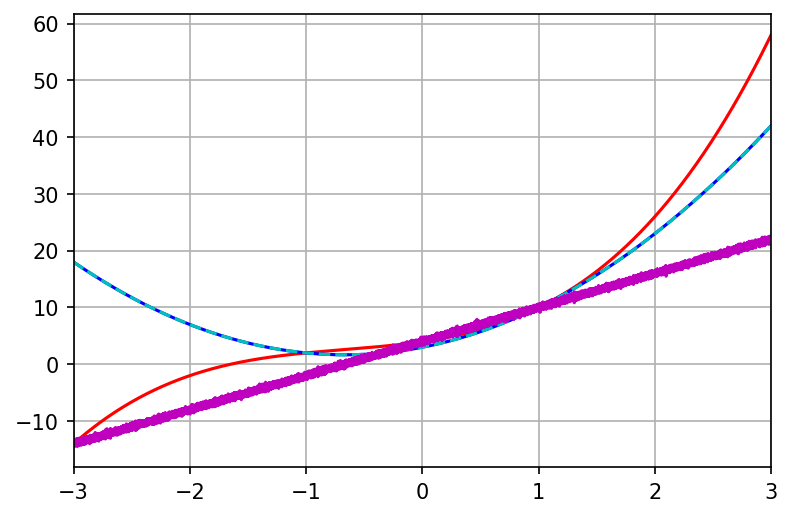

In [17]:
step = 0.0001
start = -3
stop = 3
samples = int((stop - start) / step) #wygenerowanie liczby próbek
noise_level = 0.000000001 

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = x**3 + 2*x**2 + 3*x + 4 + np.random.randn(x.shape[0])*noise_level #zdefiniowanie funkcji y

dy_real = 3*x**2 + 4*x + 3 #pierwsza pochodna idealna funkcji y
ddy_real = 6*x + 4 #druga pochodna idealna funckji y

dy_numerical = np.gradient(y, step) #pierwsza pochodna numeryczna funkcji y (gradient)
ddy_numerical = np.gradient(dy_numerical, step) #druga pochodna numeryczna funkcji y (gradient)
ddy_numerical_conv = signal.convolve(y, np.array([1, -2, 1]), mode='same') / (step**2) #druga pochodna (convolve)

print("MSE: ", mse(ddy_real[2:-2], ddy_numerical[2:-2])) #bład pochodnej numerycznej
print("MSE: ", mse(ddy_real[2:-2], ddy_numerical_conv[2:-2]))

plt.figure(dpi=150) #przedstawienie wykresów
plt.plot(x[2:-2], y[2:-2], "r-") #wykres funkcji y
plt.plot(x[2:-2], dy_real[2:-2], "b-") #wykres 1 pochodnej idealnej funkcji y
plt.plot(x[2:-2], dy_numerical[2:-2], "c--") #wykres 1 pochodnej numerycznej funckji y (gradient)
plt.plot(x[2:-2], ddy_real[2:-2], "y-") #wykres 2 pochodnej idealnej funkcji y
plt.plot(x[2:-2], ddy_numerical[2:-2], "c--") #wykres 2 pochodnej numerycznej funckji y (gradient)
plt.plot(x[2:-2], ddy_numerical_conv[2:-2], 'm--') #wykres 2 pochodnej numerycznej funckji y (convolve)
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie zakresu x do przedzialu

#na wykresach pominięto wartości brzegowe
#szum ma bardzo duze znaczenie przy liczeniu pochodnej

(-0.5, 6282.5, 6282.5, -0.5)

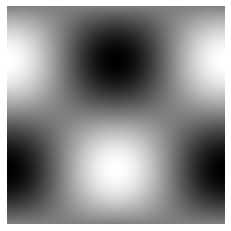

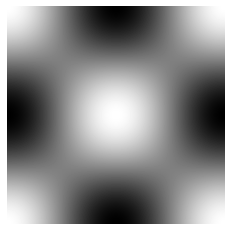

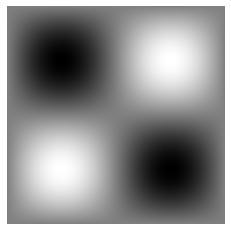

In [19]:
step = 0.001 #krok
start = -np.pi
stop = np.pi
samples = int((stop - start) / step) #wygenerowanie liczby próbek
x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej y

xs, ys = np.meshgrid(x, y) #wygenerowanie siatek na osiach x i y
# zs = np.cos(xs) + np.sin(ys)
zs = np.cos(xs)*np.sin(ys) #zdefiniowanie funkcji dwóch zmiennych zs

grad_y, grad_x = np.gradient(zs) #obliczenie pochodnej po ys i xs funkjci zs

#temp_x = grad_x[100, :]
#temp_y = grad_y[:, 100]

#plt.figure()
#plt.plot(x, temp_x, "r-")
#plt.plot(y, temp_y, "b-")
#plt.grid(True)

plt.figure() #wykres funkjci zs
plt.imshow(zs, cmap='gray')
plt.axis('off')

plt.figure() #wykres pochodnej funkcji zs po ys
plt.imshow(grad_y, cmap='gray')
plt.axis('off')

plt.figure() #wykres pochodnej funkcji zs po xs
plt.imshow(grad_x, cmap='gray')
plt.axis('off')

MSE:  0.4007978464944724
MSE:  0.40280097901879436


(-0.5, 627.5, 627.5, -0.5)

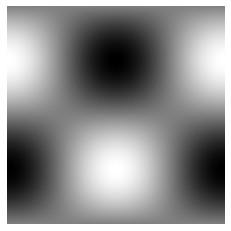

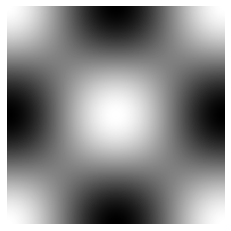

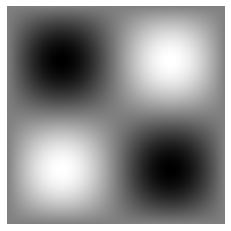

In [40]:
#ZADANIE 4
#Zaimplementuj funkcje (za pomocą pętli for, bez użycia gotowych funkcji) do obliczenia gradientu centralnego funkcji
#dowolnej liczby zmiennych (wejście w postaci tablicy N-wymiarowej). Porównaj działanie 
#(błędy numeryczne, szybkość obliczeń) do wbudowanej funkcji gradient w bibliotece numpy.

#signal = np.array([4, 7, 2, -2, 4], dtype=np.float32)
#result = np.gradient(signal)
#print(signal, "\n")
#print(result,  "\n")  

#signal_2 = np.array([[4, 7, 2, -2, 4], [1, -2, 3, 4, -5], [1, 2, 3, 4, 5]], dtype=np.float32)
#result1, result2 = np.gradient(signal_2)
#print(signal_2,  "\n")
#print(result1,  "\n")
#print(result2,  "\n")

step = 0.01 #krok
start = -np.pi
stop = np.pi
samples = int((stop - start) / step) #wygenerowanie liczby próbek
x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej y

xs, ys = np.meshgrid(x, y) #wygenerowanie siatek na osiach x i y
# zs = np.cos(xs) + np.sin(ys)
zs = np.cos(xs)*np.sin(ys) #zdefiniowanie funkcji dwóch zmiennych zs

#Funkcja dla tablicy 1-wymiarowej
def our_derivative(func, step): #zdefiniowanie funkjci do obliczania pochodnej w różnym trybie
    
    df = np.zeros(len(func)) #utworzenie tablicy wypełnionej zerami 
    
    for i in range(1,len(func)-1): #pętla dla wszystkich wartości funkcji, poza brzegowymi
        df[i]=(func[i+1]-func[i-1])/(2*step) #algorytm liczenia wartości pochodnej centralnie 
    #Punkty brzegowe   
    df[0] = (func[1] - func[0])/step #przypisanie wartości punktowi początkowemu
    df[-1] =(func[-1]-func[-2])/step #przypisanie wartości punktowi końcowemu
        
    return df #zwrócenie tablicy wypełnionej wartościami pochodnej


#Funkcja dla tablicy 2-wymiarowej
def our_gradient(func, step):
    
    grad_x = np.zeros((len(func),len(func[1])))
    grad_y = np.zeros((len(func),len(func[1])))
    
    for i in range(len(func)):
        for j in range(1,len(func[1])-1):
            grad_x[i,j] = (func[i,j+1]-func[i, j-1])/(2*step)
            
        grad_x[i,0] = (func[i,1]-func[i,0])/step
        grad_x[i,-1] = (func[i,-1]-func[i,-2])/step
     
    for j in range(len(func[1])):
        for i in range(1,len(func)-1):
            grad_y[i,j] = (func[i+1,j]-func[i-1, j])/(2*step)
            
        grad_y[0,j] = (func[1,j]-func[0,j])/step
        grad_y[-1,j] = (func[-1,j]-func[-2,j])/step
            
    return grad_y, grad_x


grad_y1, grad_x1 = our_gradient(zs, step)
grad_y, grad_x = np.gradient(zs)

print("MSE: ", mse(grad_x, grad_x1))
print("MSE: ", mse(grad_y, grad_y1))

plt.figure()
plt.imshow(zs, cmap='gray')
plt.axis('off')

plt.figure()
plt.imshow(grad_y1, cmap='gray')
plt.axis('off')

plt.figure()
plt.imshow(grad_x1, cmap='gray')
plt.axis('off')

#dla wiekszych kroków czas liczenia pochodnej funkcji 2 zmiennych bardzo sie wydluza 

(254, 199)


(-0.5, 198.5, 253.5, -0.5)

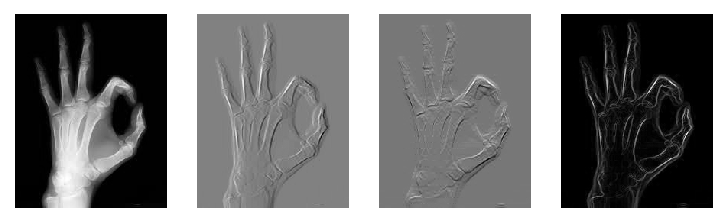

In [59]:
from PIL import Image
from skimage import io
from skimage import color

# image = Image.open("example.jpeg")
image = io.imread("example.jpeg") #wczytanie zdjecia
image = color.rgb2gray(image) #zmiana koloru zdjecia na skale szarosci

# (y, x) -> R
# N^2 -> R
# R^2 -> R
print(image.shape) #wydrukowanie rozmiaru zdjecia

grad_y, grad_x = np.gradient(image) #obliczenie gradientu zdjecia po osiach y i x
grad = np.sqrt(grad_y**2 + grad_x**2) #obliczenie magnitudy gradientu

plt.figure(dpi=150) #przedstawienie zdjecia na wykresie
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray') #wykres zdjecia
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(grad_x, cmap='gray') #wykres gradientu zdjecia po osi x
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(grad_y, cmap='gray') #wykres gradientu zdjecia po osi y
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(grad, cmap='gray') #wykres magnitudy gradientu
plt.axis('off')

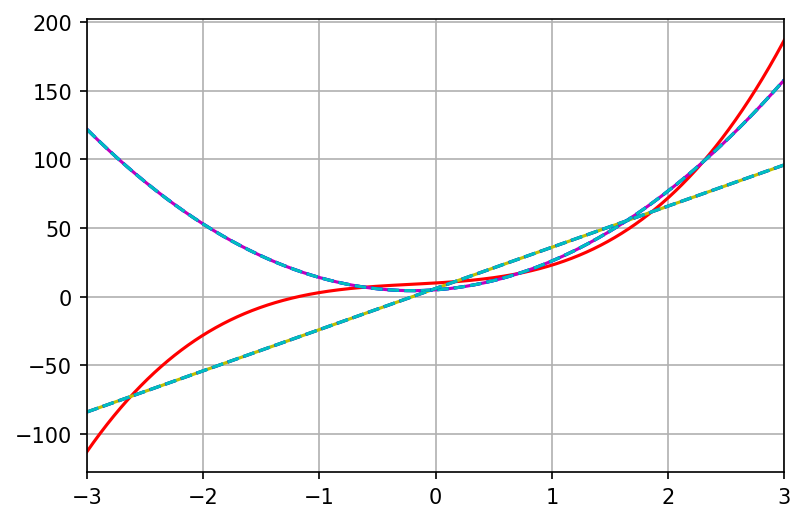

(-0.5, 627.5, 627.5, -0.5)

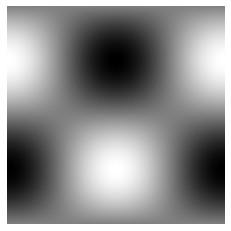

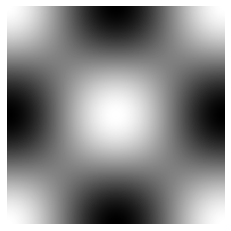

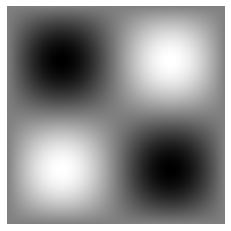

In [58]:
#ZADANIE 5
#Bazując na wszystkich wcześniejszych zadaniach zaimplementuj funkcję do obliczenia gradientu funkcji dowolnej 
#liczby zmiennych stopnia 1-4 (jako argument wejściowy), o wybranym sposobie jego obliczenia (centralny, do przodu, wstecz)
#z zachowaniem jak najmniejszego błędu (odpowiednie wyprowadzenia zostały przedstawione na wykładzie).
#Wykorzystaj splot.


def ultimate_gradient(func, step, order, mode):
    # order = {1, 2, 3, 4}
    # mode = central, forward, backward
    
    if func.ndim == 1:
    
        df = np.zeros(len(func)) #utworzenie tablicy wypełnionej zerami 
    
        if mode=="central": #oblicznie pochodnej dla różnic centralnych
            for i in range(1,len(func)-1): #pętla dla wszystkich wartości funkcji, poza brzegowymi
                df[i]=(func[i+1]-func[i-1])/(2*step) #algorytm liczenia wartości pochodnej centralnie 
            #Punkty brzegowe   
            #df[0] = (func[1] - func[0])/step #przypisanie wartości punktowi początkowemu
            #df[-1] =(func[-1]-func[-2])/step #przypisanie wartości punktowi końcowemu
    
        if mode=="forward": #oblicznie pochodnej dla różnicy progresywnej
            for i in range(len(func)-1): #pętla dla wszystkich wartości funkcji, poza końcową
                df[i]=(func[i+1]-func[i])/step #algorytm liczenia wartości pochodnej do przodu
            #Punkt końcowy   
            #df[-1] = (func[-1] - func[-2])/step #przypisanie wartości punktowi końcowemu

        if mode=="backward": #oblicznie pochodnej dla różnicy wstecznej
            for i in range(1,len(func)): #pętla dla wszystkich wartości funkcji, poza kpoczątkową
                df[i]=(func[i]-func[i-1])/step #algorytm liczenia wartości pochodnej do tyłu
            #Punkt początkowy    
            #df[0] = (func[1] - func[0])/step #przypisanie wartości punktowi początkowemu
            
        if order==1:
            return df
        else:
            return ultimate_gradient(df, step, order-1, mode)  
    
    if func.ndim == 2:
        
        grad_x = np.zeros((len(func),len(func[1])))
        grad_y = np.zeros((len(func),len(func[1])))
    
        for i in range(len(func)):
            for j in range(1,len(func[1])-1):
                grad_x[i,j] = (func[i,j+1]-func[i, j-1])/(2*step)
            
        grad_x[i,0] = (func[i,1]-func[i,0])/step
        grad_x[i,-1] = (func[i,-1]-func[i,-2])/step
     
        for j in range(len(func[1])):
            for i in range(1,len(func)-1):
                grad_y[i,j] = (func[i+1,j]-func[i-1, j])/(2*step)
            
        grad_y[0,j] = (func[1,j]-func[0,j])/step
        grad_y[-1,j] = (func[-1,j]-func[-2,j])/step
            
        return grad_y, grad_x
        

step = 0.001
start = -3
stop = 3
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples)
y = 5*x**3 + 3*x**2 + 5*x + 10    

dy_real = 15*x**2 + 6*x + 5
ddy_real = 30*x + 6

dy_numerical_cen = ultimate_gradient(y, step, 1, "central" )
dy_numerical_for = ultimate_gradient(y, step, 1, "forward" )

ddy_numerical_cen = ultimate_gradient(y, step, 2, "central" )
ddy_numerical_for = ultimate_gradient(y, step, 2, "forward" )

plt.figure(dpi=150)
plt.plot(x, y, "r")
plt.plot(x, dy_real, "m")
plt.plot(x, ddy_real, "y")
plt.plot(x[2:-2], dy_numerical_cen[2:-2], "b--")
plt.plot(x[2:-2], dy_numerical_for[2:-2], "c--")
plt.plot(x[2:-2], ddy_numerical_cen[2:-2], "b--")
plt.plot(x[4:-2], ddy_numerical_for[4:-2], "c--")
plt.grid(True)
plt.xlim(start, stop)
plt.show()


step = 0.01
start = -np.pi
stop = np.pi
samples = int((stop - start) / step)
x = np.linspace(start, stop, samples)
y = np.linspace(start, stop, samples)


xs, ys = np.meshgrid(x, y)
# zs = np.cos(xs) + np.sin(ys)
zs = np.cos(xs)*np.sin(ys)


grad_y1, grad_x1 = ultimate_gradient(zs, step, 1, "central")
plt.figure()
plt.imshow(zs, cmap='gray')
plt.axis('off')

plt.figure()
plt.imshow(grad_y1, cmap='gray')
plt.axis('off')

plt.figure()
plt.imshow(grad_x1, cmap='gray')
plt.axis('off')